<a href="https://colab.research.google.com/github/e-saidha/credit_card_fraud_detection/blob/main/eda_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [3]:
import os
path1 = os.listdir(path)


In [4]:
df = pd.read_csv(f'{path}/{path1[0]}')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<Axes: xlabel='Class'>

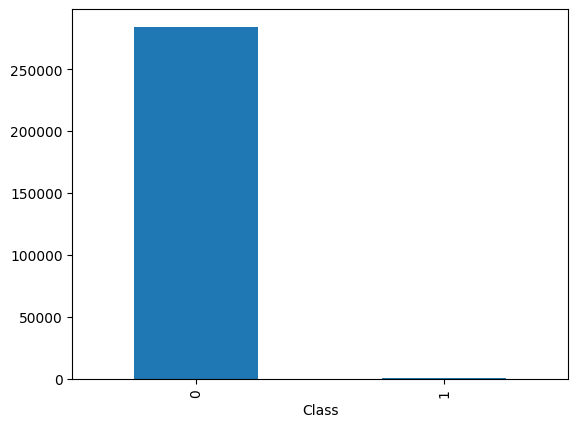

In [7]:
df['Class'].value_counts().plot(kind = 'bar')

In [8]:
df['Class'].value_counts(normalize =True)*100

,proportion
Class,
0,99.827251
1,0.172749


Fraud cases are extremely rare so we cannot use accuracy as a metric

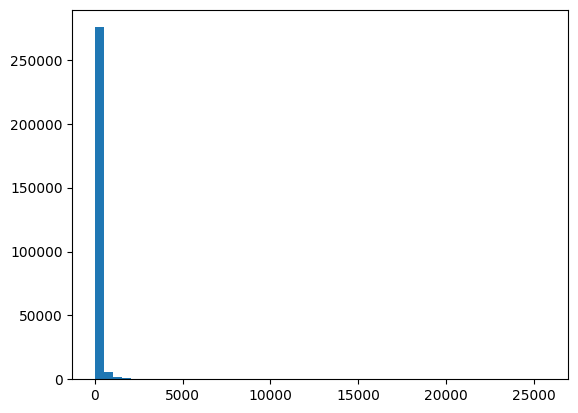

In [9]:
plt.hist(df[df['Class']==0]['Amount'], bins=50)
plt.show()

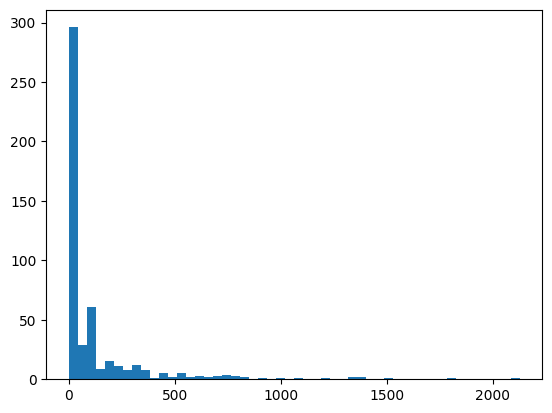

In [10]:
plt.hist(df[df['Class']==1]['Amount'], bins=50)
plt.show()

Fraud transactions show a different spread of amounts than legit ones

In [11]:
df['hour'] = (df['Time']//3600)%24

In [12]:
fraud_by_hour = df[df['Class'] == 1]['hour'].value_counts(normalize =True).sort_index()
legit_by_hour = df[df['Class'] == 0]['hour'].value_counts(normalize =True).sort_index()

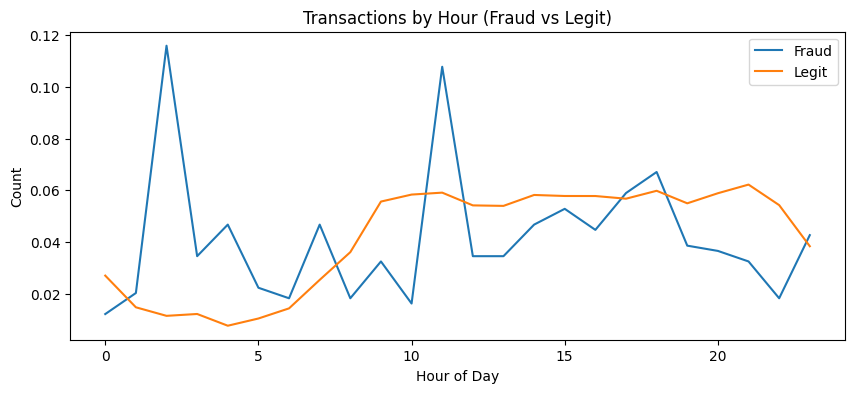

In [13]:
plt.figure(figsize=(10,4))
plt.plot(fraud_by_hour.index, fraud_by_hour.values, label='Fraud')
plt.plot(legit_by_hour.index, legit_by_hour.values, label='Legit')
plt.title("Transactions by Hour (Fraud vs Legit)")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend()
plt.show()

We observe fraud spikes

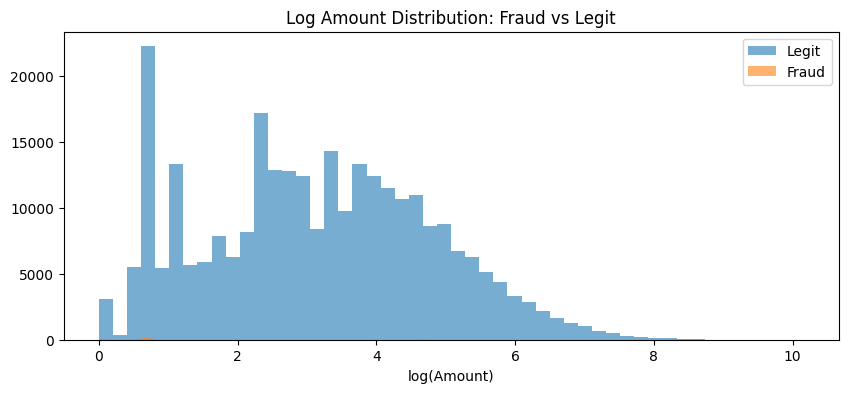

In [14]:
plt.figure(figsize=(10,4))
plt.hist(np.log1p(df[df['Class']==0]['Amount']), bins=50, alpha=0.6, label='Legit')
plt.hist(np.log1p(df[df['Class']==1]['Amount']), bins=50, alpha=0.6, label='Fraud')
plt.title("Log Amount Distribution: Fraud vs Legit")
plt.xlabel("log(Amount)")
plt.legend()
plt.show()

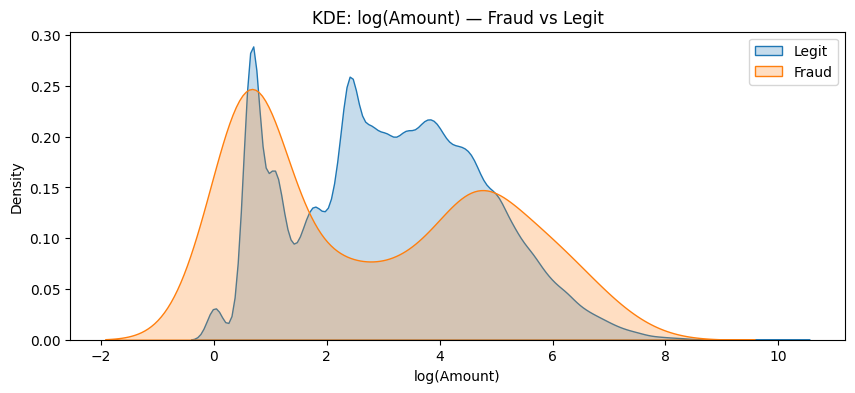

In [15]:
plt.figure(figsize=(10,4))
sns.kdeplot(np.log1p(df[df['Class']==0]['Amount']), label='Legit', fill=True)
sns.kdeplot(np.log1p(df[df['Class']==1]['Amount']), label='Fraud', fill =True)
plt.title("KDE: log(Amount) — Fraud vs Legit")
plt.xlabel("log(Amount)")
plt.legend()
plt.show()


Fraudulent transactions show a bimodal amount distribution, with elevated likelihood in both small and very large transaction ranges. Legitimate transactions concentrate in the mid-range.

In [16]:
corr = df.corr()

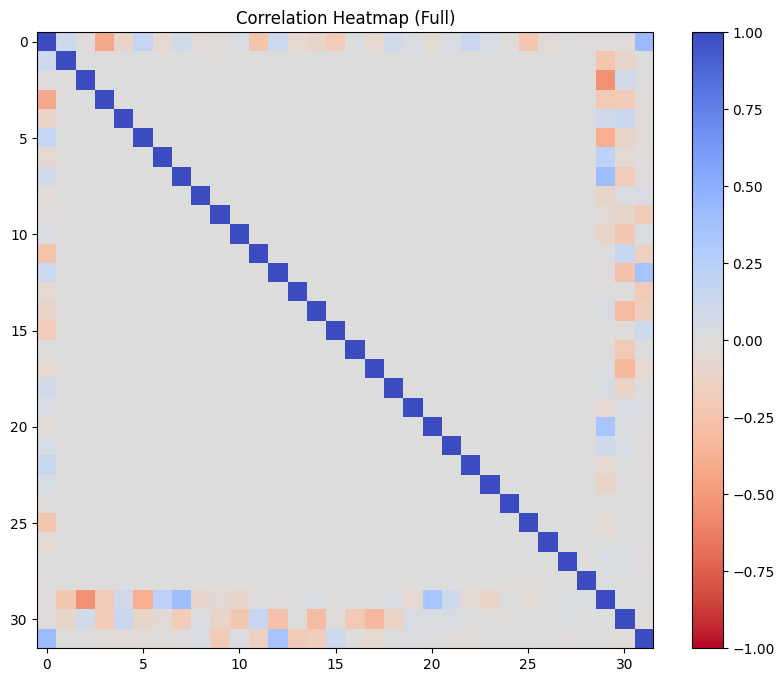

In [17]:
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.colorbar()
plt.title("Correlation Heatmap (Full)")
plt.show()

In [18]:
fraud_corr = corr['Class'].abs().sort_values()
fraud_corr.head(100)


,Class
V22,0.000805
V23,0.002685
V25,0.003308
V15,0.004223
V26,0.004455
V13,0.004570
Amount,0.005632
V24,0.007221
V28,0.009536
Time,0.012323


Since features in our data are PCA we dont see much linear correlation

/tmp/ipython-input-2994695374.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_buck = df.groupby('amt_buck')['Amount'].sum()


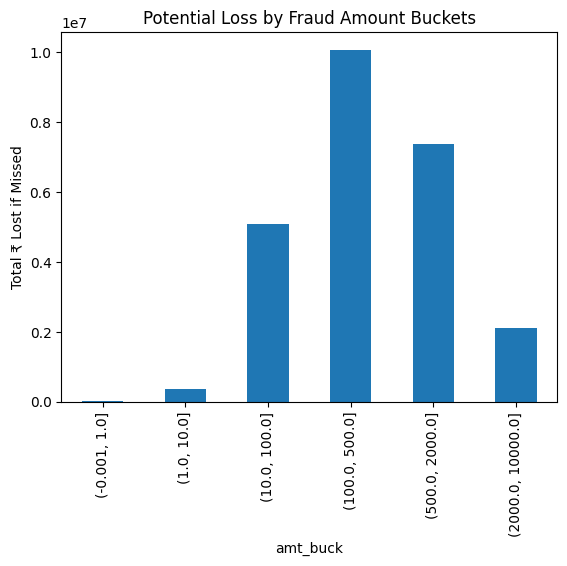

In [19]:
df['amt_buck'] = pd.cut(df['Amount'], bins =[0,1,10,100,500,2000,10000], include_lowest =True)
loss_buck = df.groupby('amt_buck')['Amount'].sum()
loss_buck.plot(kind='bar')
plt.title("Potential Loss by Fraud Amount Buckets")
plt.ylabel("Total ₹ Lost if Missed")
plt.show()
